In [36]:
import json 
with open('val_sceneGraphs.json') as f:
    scene_graphs = json.load(f)

with open('valid.json') as f:
    questions = json.load(f)

for question in questions:
        object_texts = []
        object_list = []        
        query = question['sent']
        required_objects = []
        relation_texts = []
        image_id = question['img_id']
        if str(image_id) in scene_graphs:
            scene_graph = scene_graphs[str(image_id)]
            objects = scene_graph['objects']
        else:
            continue
            
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            object_list.append(object_name.lower())
            object_list.extend(object_name.split())

        for i in query.replace(",", " ").replace(".", " ").replace("?", " ").split(" "):
            if i.lower() in object_list:
                required_objects.append(i.lower())
            elif i.lower() != "" and i.lower() in mods:
                for j in mods[i]:
                    if j.lower() in object_list:
                        required_objects.append(j.lower())
            
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            attributes = object_data['attributes']
            attribute_text = ' '.join(attributes)
            object_text = ""
            if attribute_text:
                object_text = f"{attribute_text} "
            object_text += object_name
            if object_name.split(" ")[0].lower() in required_objects:
                object_texts.append(object_text)

    
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            relations = object_data['relations']
            if object_name.split(" ")[0].lower() in required_objects:
                for relation in relations:
                    relation_name = relation['name']
                    related_object_id = relation['object']
                    related_object_name = objects[related_object_id]['name']
                    relation_text = f"{object_name} {relation_name} {related_object_name}"
                    relation_texts.append(relation_text)
        scene_text = ', '.join(list(set(object_texts)) + relation_texts)                
        question['sent'] += f" ({scene_text})"


# save dictionary as JSON file
with open("valid_sg.json", "w") as outfile:
    json.dump(questions, outfile)    

In [16]:
with open('train_sceneGraphs.json') as f:
    scene_graphs = json.load(f)

with open('train.json') as f:
    questions = json.load(f)

for question in questions:
    image_id = question['img_id']
    if str(image_id) in scene_graphs:
        scene_graph = scene_graphs[str(image_id)]
        objects = scene_graph['objects']
        object_groups = {}
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            attributes = object_data['attributes']
            attribute_text = ' '.join(attributes)
            object_text = ""
            if attribute_text:
                object_text = f"{attribute_text} "
            object_text += object_name
            if object_name not in object_groups:
                object_groups[object_name] = []
            object_groups[object_name].append(object_text)
        relation_texts = []
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            relations = object_data['relations']
            for relation in relations:
                relation_name = relation['name']
                related_object_id = relation['object']
                related_object_name = objects[related_object_id]['name']
                if related_object_name != object_name and related_object_name in object_groups:
                    object_texts = object_groups[related_object_name]
                    object_text = object_texts[0]
                    if ', '.join(object_groups[object_name])[-1] == 's':
                        relation_text = f"{' and '.join(list(set(object_groups[object_name])))} are {relation_name} {object_text}"
                    else:
                        relation_text = f"{' and '.join(list(set(object_groups[object_name])))} is {relation_name} {object_text}"
                    relation_texts.append(relation_text)
        if len(relation_texts) != 0:
            scene_text = ', '.join(set(relation_texts))
            question['sent'] += f" ({scene_text})"
# save dictionary as JSON file
with open("train_sg.json", "w") as outfile:
    json.dump(questions, outfile)    

In [1]:
import json 

with open('modifiers_dict.json') as f:
    mods = json.load(f)

## Dataset Analysis

In [15]:
import json
with open('valid.json') as f:
    questions = json.load(f)

list_of_all_questions = [x['sent'] for x in questions]

In [16]:
import re
pattern = re.compile(r'\b(what|how|is|are|who|when|where|why|do|on|does|what\'s|the|where|of)\b', re.IGNORECASE)

question_type_counts = {}

# Loop over each question in the dataset
for question in list_of_all_questions:
    match = pattern.search(question)
    if match:
        # Increment the count for the matched question type
        question_type = match.group().lower()
        question_type_counts[question_type] = question_type_counts.get(question_type, 0) + 1
sorted_question_types = sorted(question_type_counts.items(), key=lambda x: x[1], reverse=True)

for question_type, count in sorted_question_types:
    print(f'{question_type}: {count}')


what: 42267
is: 34982
are: 16204
who: 7510
of: 7098
do: 6649
does: 5818
on: 5190
the: 2265
how: 2204
where: 1822


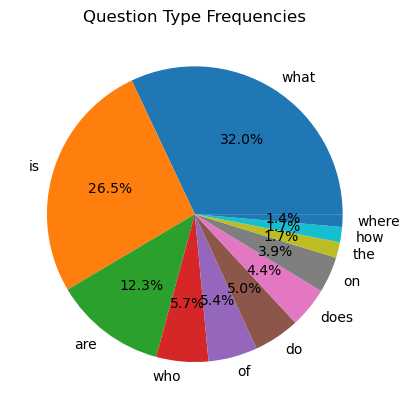

In [17]:
import matplotlib.pyplot as plt

question_type_counts_list = list(question_type_counts.items())
question_type_counts_list.sort(key=lambda x: x[1], reverse=True)

question_types = [x[0] for x in question_type_counts_list]
frequencies = [x[1] for x in question_type_counts_list]

# Create a pie chart
plt.pie(frequencies, labels=question_types, autopct='%1.1f%%')

# Add a title
plt.title('Question Type Frequencies')

# Show the chart
plt.show()

In [18]:
import json
with open('train.json') as f:
    questions = json.load(f)

list_of_all_questions = [x['sent'] for x in questions]

In [19]:
import re
pattern = re.compile(r'\b(what|how|is|are|who|when|where|why|do|on|does|what\'s|the|where|of)\b', re.IGNORECASE)

question_type_counts = {}

# Loop over each question in the dataset
for question in list_of_all_questions:
    match = pattern.search(question)
    if match:
        # Increment the count for the matched question type
        question_type = match.group().lower()
        question_type_counts[question_type] = question_type_counts.get(question_type, 0) + 1
sorted_question_types = sorted(question_type_counts.items(), key=lambda x: x[1], reverse=True)

for question_type, count in sorted_question_types:
    print(f'{question_type}: {count}')

what: 301452
is: 249212
are: 115227
who: 53475
of: 52272
do: 47583
does: 41428
on: 36646
the: 16110
how: 15996
where: 13248


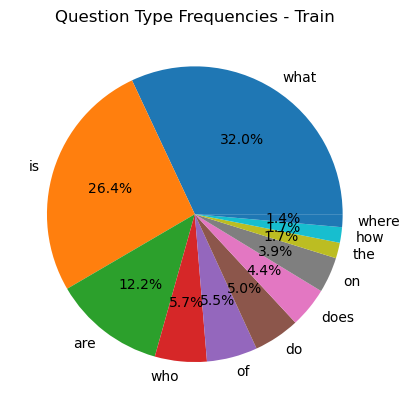

In [20]:
import matplotlib.pyplot as plt

question_type_counts_list = list(question_type_counts.items())
question_type_counts_list.sort(key=lambda x: x[1], reverse=True)

question_types = [x[0] for x in question_type_counts_list]
frequencies = [x[1] for x in question_type_counts_list]

# Create a pie chart
plt.pie(frequencies, labels=question_types, autopct='%1.1f%%')

# Add a title
plt.title('Question Type Frequencies - Train')

# Show the chart
plt.show()

In [21]:
import json

with open('valid.json', 'r') as f:
    gqa_dataset = json.load(f)

what_questions = [q for q in gqa_dataset if q['sent'].lower().startswith('what')]

# Write the filtered dataset to a new JSON file
with open('what_questions.json', 'w') as f:
    json.dump(what_questions, f)